## Simple Linear Regression
- developer: mehdi sahraei
- link github

### Importing Needed packages


In [182]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [183]:
df = pd.read_csv("split_with_timestep.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,x1,x2,x3,x4,x5,y
0,36471.589844,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906
1,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313
2,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844
3,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969
4,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969,37920.281250


### Data Exploration

In [184]:
df.describe()

,x1,x2,x3,x4,x5,y
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,26925.482373,26882.994162,26844.421083,26801.118338,26757.869917,26718.222450
std,9766.129024,9757.751368,9752.832695,9745.445748,9736.137801,9723.569025
min,15782.300781,15782.300781,15782.300781,15782.300781,15782.300781,15782.300781
25%,19308.215820,19308.215820,19308.215820,19308.215820,19308.215820,19308.215820
50%,21657.848633,21616.620118,21593.583008,21561.271485,21528.958985,21528.958985
75%,37756.187500,37756.187500,37756.187500,37756.187500,37756.187500,37756.187500
max,47456.898438,47456.898438,47456.898438,47456.898438,47456.898438,47456.898438


### A more concise view of the data

In [185]:
cdf = df[['x1','x2','x3','x4','x5','y']]
cdf.head(10)

,x1,x2,x3,x4,x5,y
0,36471.589844,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906
1,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313
2,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844
3,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969
4,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969,37920.281250
5,36841.878906,37128.445313,37780.714844,38151.917969,37920.281250,38481.765625
6,37128.445313,37780.714844,38151.917969,37920.281250,38481.765625,38743.714844
7,37780.714844,38151.917969,37920.281250,38481.765625,38743.714844,36944.804688
8,38151.917969,37920.281250,38481.765625,38743.714844,36944.804688,37149.265625
9,37920.281250,38481.765625,38743.714844,36944.804688,37149.265625,41501.480469


### data histogram

- For example, if the cylinder value be 4, There are 400 data in the dataset, whose cylinder is equal to 4

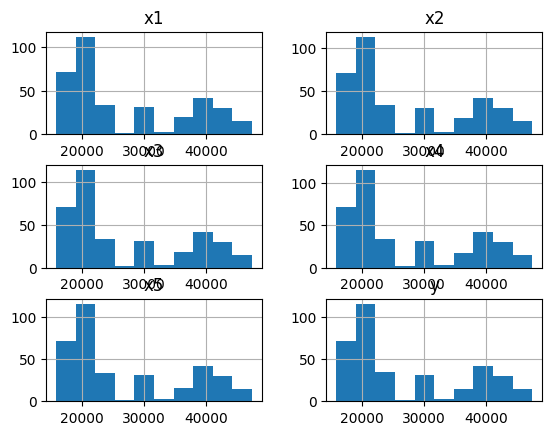

In [187]:
df_hist = cdf[['x1','x2','x3','x4','x5','y']]
df_hist.hist()
plt.show()

### drawing plot and scatter

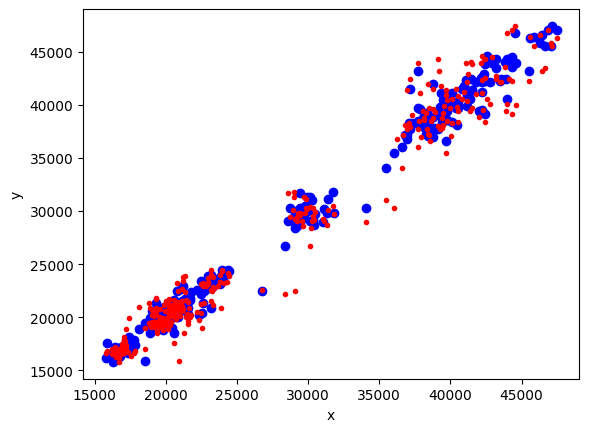

In [200]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cdf.x5, cdf.y,  color='blue')
ax.scatter(cdf.x3, cdf.y,  color='red',marker='.')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Creating train and test dataset
#### 20 % for test and 80 for train

In [201]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [202]:
print('train: \t', train.shape, '\n' , 'test: \t', test.shape)

train: 	 (299, 6) 
 test: 	 (61, 6)


### drawing plot and scatter train and test

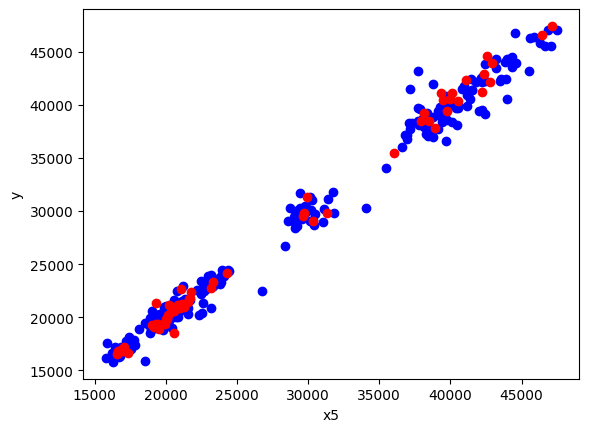

In [205]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(train.x5, train.y,  color='blue')
ax.scatter(test.x5, test.y,  color='red')
plt.xlabel("x5")
plt.ylabel("y")
plt.show()

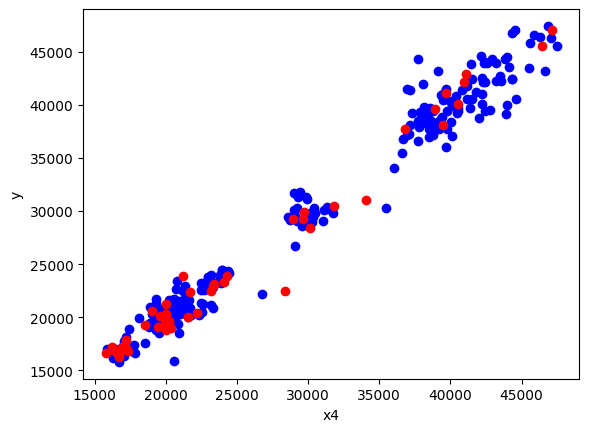

In [92]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(train.x4, train.y,  color='blue')
ax.scatter(test.x4, test.y,  color='red')
plt.xlabel("x4")
plt.ylabel("y")
plt.show()

### normalizing data

#### before norm

In [213]:
#asanyarray: converting to normal array 
train_x = np.asanyarray(train[['x5']])
train_y = np.asanyarray(train[['y']])

test_x = np.asanyarray(test[['x5']])
test_y = np.asanyarray(test[['y']])

#### after norm

In [206]:
# scaler = MinMaxScaler(feature_range = (0,1))
# train_x_ = scaler.fit_transform(train_x)
# train_y_ = scaler.fit_transform(train_y)

# test_x_ = scaler.fit_transform(test_x)
# test_y_ = scaler.fit_transform(test_y)

### training model

- Converting the data into a normal array So that it is suitable for the model format

- [link regr](https://scikit-learn.org/stable/supervised_learning.html)

In [216]:
from sklearn import linear_model

regr = linear_model.LinearRegression()


#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
regr.fit (train_x, train_y)

# The coefficients
print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.98844794]]
Intercept:  [235.78186804]


### model Evaluation

In [230]:
from sklearn.metrics import r2_score

predict = regr.predict(test_x) #y_hat

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predict) )


Mean absolute error: 566.61
Residual sum of squares (MSE): 689163.37
R2-score: 0.99


### testing

In [232]:
predict[:3]

array([[37718.00593741],
       [42330.28552115],
       [38671.30992496]])

In [233]:
test_y[:3]

array([[38481.765625],
       [44578.277344],
       [37846.316406]])

### plotting

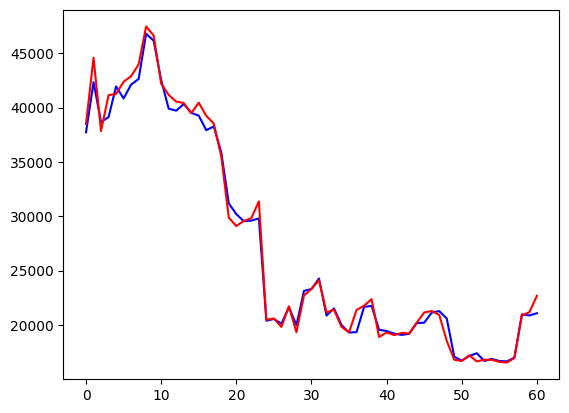

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(predict,'-b')
ax.plot(test_y,'-r')
plt.show()